# Deep Learning for Computer Vision(DL for CV)

The field of computer vision is shifting from statistical methods to deep learning neural network methods.
There are still many challenging problems to solve in computer vision. Nevertheless, deep learning methods are achieving state-of-the-art results on some specific problems.
It is not just the performance of deep learning models on benchmark problems that is most interesting; it is the fact that a single model can learn meaning from images and perform vision tasks, obviating the need for a pipeline of specialized and hand-crafted methods.

The most impressive applications of deep learning methods in the field of computer vision:

1. Image Classification
2. Image Classification With Localization
3. Object Detection
4. Object Segmentation
5. Image Style Transfer
6. Image Colorization
7. Image Reconstruction
8. Image Super-Resolution
9. Image Synthesis
10. Other Problems

**Computer Vision**, or CV for short, is broadly defined as helping computers to “see” or extract meaning from digital images such as photographs and videos.The problem of understanding images is not solved, and may never be. This is primarily because the world is complex and messy. There are few rules. And yet we can easily and effortlessly recognize objects, people, and context.

A property of **deep learning** is that the performance of this type of model improves by training it with more examples and by increasing its depth or representational capacity.
In addition to scalability, another often-cited benefit of deep learning models is their ability to perform automatic feature extraction from raw data, also called feature learning.

Some of the first large demonstrations of the power of deep learning were in computer vision, specifically image classification. More recently in object detection and face recognition.

The three key promises of deep learning for computer vision are as follows:

- **The Promise of Feature Learning.** That is, that deep learning methods can automatically learn the features from image data required by the model, rather than requiring that the feature detectors be handcrafted and specified by an expert.
- **The Promise of Continued Improvement.** That is, that the performance of deep learning in computer vision is based on real results and that the improvements appear to be continuing and perhaps speeding up.
- **The Promise of End-to-End Models.** That is, that large end-to-end deep learning models can be fit on large datasets of images or video offering a more general and better-performing approach.

Computer vision is not “solved” but deep learning is required to get you to the state-of-the-art on many challenging problems in the field.

## Preparing Image Data
Images are comprised of matrices of pixel values.

Pixel values are often unsigned integers in the range between 0 and 255. Although these pixel values can be presented directly to neural network models in their raw format, this can result in challenges during modeling, such as slower than expected training of the model.
Instead, there can be great benefit in preparing the image pixel values prior to modeling, such as simply scaling pixel values to the range 0-1 to centering and even standardizing the values.
This is called normalization and can be performed directly on a loaded image. The example below uses the PIL library (the standard image handling library in Python) to load an image and normalize its pixel values.

we can use the **Pillow library** to load the photo, confirm the min and max pixel values, normalize the values, and confirm the normalization was performed.

In [1]:
# example of pixel normalization
from numpy import asarray
from PIL import Image
# load image
image = Image.open('C:\\Users\\user\\Desktop\\ML\\Data\\bondi_beach.jpg')
pixels = asarray(image)
# confirm pixel range is 0-255
print('Data Type: %s' % pixels.dtype)
print('Min: %.3f, Max: %.3f' % (pixels.min(), pixels.max()))
# convert from integers to floats
pixels = pixels.astype('float32')
# normalize to the range 0-1
pixels /= 255.0
# confirm the normalization
print('Min: %.3f, Max: %.3f' % (pixels.min(), pixels.max()))

Data Type: uint8
Min: 0.000, Max: 255.000
Min: 0.000, Max: 1.000


### Manually Scale Image Pixel Data for Deep Learning

Black and white images are single matrix of pixels, whereas color images have a separate array of pixel values for each color channel, such as red, green, and blue.

- Normalize Pixel Values

Neural networks process inputs using small weight values, and inputs with large integer values can disrupt or slow down the learning process. As such it is good practice to normalize the pixel values so that each pixel value has a value between 0 and 1.
It is valid for images to have pixel values in the range 0-1 and images can be viewed normally.
This can be achieved by dividing all pixels values by the largest pixel value; that is 255. This is performed across all channels, regardless of the actual range of pixel values that are present in the image.

In [2]:
# load and show an image with Pillow
from PIL import Image
# load the image
image = Image.open('C:\\Users\\user\\Desktop\\ML\\Data\\sydney_bridge.jpg')
# summarize some details about the image
print(image.format)
print(image.mode)
print(image.size)
# show the image
image.show()

# pixel normalization
from numpy import asarray
from PIL import Image
# load image
image = Image.open('C:\\Users\\user\\Desktop\\ML\\Data\\sydney_bridge.jpg')
pixels = asarray(image)
# confirm pixel range is 0-255
print('Data Type: %s' % pixels.dtype)
print('Min: %.3f, Max: %.3f' % (pixels.min(), pixels.max()))
# convert from integers to floats
pixels = pixels.astype('float32')
# normalize to the range 0-1
pixels /= 255.0
# confirm the normalization
print('Min: %.3f, Max: %.3f' % (pixels.min(), pixels.max()))

PNG
RGBA
(1280, 856)
Data Type: uint8
Min: 0.000, Max: 255.000
Min: 0.000, Max: 1.000


- **Center Pixel Values**

A popular data preparation technique for image data is to subtract the mean value from the pixel values.
This approach is called centering, as the distribution of the pixel values is centered on the value of zero.

Centering can be performed before or after normalization. Centering the pixels then normalizing will mean that the pixel values will be centered close to 0.5 and be in the range 0-1. Centering after normalization will mean that the pixels will have positive and negative values, in which case images will not display correctly (e.g. pixels are expected to have value in the range 0-255 or 0-1). Centering after normalization might be preferred, although it might be worth testing both approaches.

Centering requires that a mean pixel value be calculated prior to subtracting it from the pixel values. There are multiple ways that the mean can be calculated; for example:

- Per image.
- Per mini-batch of images (under stochastic gradient descent).
- Per training dataset.

The mean can be calculated for all pixels in the image, referred to as a global centering, or it can be calculated for each channel in the case of color images, referred to as local centering.

- Global Centering: Calculating and subtracting the mean pixel value across color channels.
- Local Centering: Calculating and subtracting the mean pixel value per color channel.

Per-image global centering is common because it is trivial to implement. Also common is per mini-batch global or local centering for the same reason: it is fast and easy to implement.

In some cases, per-channel means are pre-calculated across an entire training dataset. In this case, the image means must be stored and used both during training and any inference with the trained models in the future. For example, the per-channel pixel means calculated for the ImageNet training dataset are as follows:

    ImageNet Training Dataset Means: [0.485, 0.456, 0.406]
    
For models trained on images centered using these means that may be used for transfer learning on new tasks, it can be beneficial or even required to normalize images for the new task using the same means.

In [3]:
# example of global centering (subtract mean)
from numpy import asarray
from PIL import Image
# load image
image = Image.open('C:\\Users\\user\\Desktop\\ML\\Data\\sydney_bridge.jpg')
pixels = asarray(image)
# convert from integers to floats
pixels = pixels.astype('float32')
# calculate global mean
mean = pixels.mean()
print('Mean: %.3f' % mean)
print('Min: %.3f, Max: %.3f' % (pixels.min(), pixels.max()))
# global centering of pixels
pixels = pixels - mean
# confirm it had the desired effect
mean = pixels.mean()
print('Mean: %.3f' % mean)
print('Min: %.3f, Max: %.3f' % (pixels.min(), pixels.max()))

Mean: 184.501
Min: 0.000, Max: 255.000
Mean: -0.000
Min: -184.501, Max: 70.499


- Local Centering

The example below calculates the mean for each color channel in the loaded image, then centers the pixel values for each channel separately.

Note that NumPy allows us to specify the dimensions over which a statistic like the mean, min, and max are calculated via the “axis” argument. In this example, we set this to (0,1) for the width and height dimensions, which leaves the third dimension or channels. The result is one mean, min, or max for each of the three channel arrays.

Also note that when we calculate the mean that we specify the dtype as ‘float64‘; this is required as it will cause all sub-operations of the mean, such as the sum, to be performed with 64-bit precision. Without this, the sum will be performed at lower resolution and the resulting mean will be wrong given the accumulated errors in the loss of precision, in turn meaning the mean of the centered pixel values for each channel will not be zero (or a very small number close to zero).

In [4]:
# example of per-channel centering (subtract mean)
from numpy import asarray
from PIL import Image
# load image
image = Image.open('C:\\Users\\user\\Desktop\\ML\\Data\\sydney_bridge.jpg')
pixels = asarray(image)
# convert from integers to floats
pixels = pixels.astype('float32')
# calculate per-channel means and standard deviations
means = pixels.mean(axis=(0,1), dtype='float64')
print('Means: %s' % means)
print('Mins: %s, Maxs: %s' % (pixels.min(axis=(0,1)), pixels.max(axis=(0,1))))
# per-channel centering of pixels
pixels -= means
# confirm it had the desired effect
means = pixels.mean(axis=(0,1), dtype='float64')
print('Means: %s' % means)
print('Mins: %s, Maxs: %s' % (pixels.min(axis=(0,1)), pixels.max(axis=(0,1))))

Means: [158.43480487 159.58662109 164.9829202  255.        ]
Mins: [  0.   0.   0. 255.], Maxs: [255. 255. 255. 255.]
Means: [-3.06365524e-07 -1.24562507e-06  4.88580506e-07  0.00000000e+00]
Mins: [-158.4348  -159.58662 -164.98293    0.     ], Maxs: [96.56519  95.413376 90.01708   0.      ]


- **Standardize Pixel Values**

The distribution of pixel values often follows a Normal or Gaussian distribution, e.g. bell shape.

This distribution may be present per image, per mini-batch of images, or across the training dataset and globally or per channel.
As such, there may be benefit in transforming the distribution of pixel values to be a standard Gaussian: that is both centering the pixel values on zero and normalizing the values by the standard deviation. The result is a standard Gaussian of pixel values with a mean of 0.0 and a standard deviation of 1.0.
As with centering, the operation can be performed per image, per mini-batch, and across the entire training dataset, and it can be performed globally across channels or locally per channel.
Standardization may be preferred to normalization and centering alone and it results in both zero-centered values of small input values, roughly in the range -3 to 3, depending on the specifics of the dataset.
For consistency of the input data, it may make more sense to standardize images per-channel using statistics calculated per mini-batch or across the training dataset, if possible.

- Global Standardization
The example below calculates the mean and standard deviation across all color channels in the loaded image, then uses these values to standardize the pixel values.

In [5]:
# example of global pixel standardization
from numpy import asarray
from PIL import Image
# load image
image = Image.open('C:\\Users\\user\\Desktop\\ML\\Data\\sydney_bridge.jpg')
pixels = asarray(image)
# convert from integers to floats
pixels = pixels.astype('float32')
# calculate global mean and standard deviation
mean, std = pixels.mean(), pixels.std()
print('Mean: %.3f, Standard Deviation: %.3f' % (mean, std))
# global standardization of pixels
pixels = (pixels - mean) / std
# confirm it had the desired effect
mean, std = pixels.mean(), pixels.std()
print('Mean: %.3f, Standard Deviation: %.3f' % (mean, std))

Mean: 184.501, Standard Deviation: 73.418
Mean: -0.000, Standard Deviation: 1.000


- Positive Global Standardization

There may be a desire to maintain the pixel values in the positive domain, perhaps so the images can be visualized or perhaps for the benefit of a chosen activation function in the model.

A popular way of achieving this is to clip the standardized pixel values to the range [-1, 1] and then rescale the values from [-1,1] to [0,1].

In [6]:
# example of global pixel standardization shifted to positive domain
from numpy import asarray
from numpy import clip
from PIL import Image
# load image
image = Image.open('C:\\Users\\user\\Desktop\\ML\\Data\\sydney_bridge.jpg')
pixels = asarray(image)
# convert from integers to floats
pixels = pixels.astype('float32')
# calculate global mean and standard deviation
mean, std = pixels.mean(), pixels.std()
print('Mean: %.3f, Standard Deviation: %.3f' % (mean, std))
# global standardization of pixels
pixels = (pixels - mean) / std
# clip pixel values to [-1,1]
pixels = clip(pixels, -1.0, 1.0)
# shift from [-1,1] to [0,1] with 0.5 mean
pixels = (pixels + 1.0) / 2.0
# confirm it had the desired effect
mean, std = pixels.mean(), pixels.std()
print('Mean: %.3f, Standard Deviation: %.3f' % (mean, std))
print('Min: %.3f, Max: %.3f' % (pixels.min(), pixels.max()))

Mean: 184.501, Standard Deviation: 73.418
Mean: 0.563, Standard Deviation: 0.396
Min: 0.000, Max: 0.980


- Local Standardization

The example below calculates the mean and standard deviation of the loaded image per-channel, then uses these statistics to standardize the pixels separately in each channel.

In [7]:
# example of per-channel pixel standardization
from numpy import asarray
from PIL import Image
# load image
image = Image.open('C:\\Users\\user\\Desktop\\ML\\Data\\sydney_bridge.jpg')
pixels = asarray(image)
# convert from integers to floats
pixels = pixels.astype('float32')
# calculate per-channel means and standard deviations
means = pixels.mean(axis=(0,1), dtype='float64')
stds = pixels.std(axis=(0,1), dtype='float64')
print('Means: %s, Stds: %s' % (means, stds))
# per-channel standardization of pixels
pixels = (pixels - means) / stds
# confirm it had the desired effect
means = pixels.mean(axis=(0,1), dtype='float64')
stds = pixels.std(axis=(0,1), dtype='float64')
print('Means: %s, Stds: %s' % (means, stds))

Means: [158.43480487 159.58662109 164.9829202  255.        ], Stds: [70.63586854 70.73750037 70.1171148   0.        ]
Means: [-3.98300453e-13 -1.93157989e-13  3.25967320e-13             nan], Stds: [ 1.  1.  1. nan]


C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in true_divide
  


**Extensions**

- Develop Function. Develop a function to scale a provided image, using arguments to choose the type of preparation to perform,
- Projection Methods. Investigate and implement data preparation methods that remove linear correlations from the pixel data, such as PCA and ZCA.
- Dataset Statistics. Select and update one of the centering or standardization examples to calculate statistics across an entire training dataset, then apply those statistics when preparing image data for training or inference.

### Evaluate Pixel Scaling Methods for Image Classification With CNNs

#### Procedure for Choosing a Pixel Scaling Method
Given a new image classification task, what pixel scaling methods should be used?

- Step 1: Choose Dataset. This may be the entire training dataset or a small subset. The idea is to complete the experiments quickly and get a result.
- Step 2: Choose Model. Design a model that is skillful, but not necessarily the best model for the problem. Some parallel prototyping of models may be required.
- Step 3: Choose Pixel Scaling Methods. List 3-5 data preparation schemes for evaluation of your problem.
- Step 4: Run Experiment. Run the experiments in such a way that the results are robust and representative, ideally repeat each experiment multiple times.
- Step 5: Analyze Results. Compare methods both in terms of the speed of learning and mean performance across repeated experiments.

A clear signal of a superior pixel scaling method may be seen in one of two ways:

- Faster Learning. Learning curves clearly show that a model learns faster with a given data preparation scheme.
- Better Accuracy. Mean model performance clearly shows better accuracy with a given data preparation scheme.

- Choose Dataset: MNIST Image Classification

The MNIST problem, or MNIST for short, is an image classification problem comprised of 70,000 images of handwritten digits.
The goal of the problem is to classify a given image of a handwritten digit as an integer from 0 to 9. As such, it is a multiclass image classification problem.
It is a standard dataset for evaluating machine learning and deep learning algorithms. Best results for the dataset are about 99.79% accurate, or an error rate of about 0.21% (e.g. less than 1%).
This dataset is provided as part of the Keras library and can be automatically downloaded (if needed) and loaded into memory by a call to the keras.datasets.mnist.load_data() function.

In [8]:
# load and summarize the MNIST dataset
from keras.datasets import mnist
# load dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
# summarize dataset shape
print('Train', train_images.shape, train_labels.shape)
print('Test', (test_images.shape, test_labels.shape))
# summarize pixel values
print('Train', train_images.min(), train_images.max(), train_images.mean(), train_images.std())
print('Train', test_images.min(), test_images.max(), test_images.mean(), test_images.std())

Using TensorFlow backend.


Train (60000, 28, 28) (60000,)
Test ((10000, 28, 28), (10000,))
Train 0 255 33.318421449829934 78.56748998339798
Train 0 255 33.791224489795916 79.17246322228644


- Choose Model: Convolutional Neural Network

We will use a convolutional neural network model to evaluate the different pixel scaling methods.

A CNN is expected to perform very well on this problem, although the model chosen for this experiment does not have to perform well or best for the problem. Instead, it must be skillful (better than random) and must allow the impact of different data preparation schemes to be differentiated in terms of speed of learning and/or model performance.
As such, the model must have sufficient capacity to learn the problem.
We will demonstrate the baseline model on the MNIST problem.

First, the dataset must be loaded and the shape of the train and test dataset expanded to add a channel dimension, set to one as we only have a single black and white channel.

Next, we will normalize the pixel values for this example and one hot encode the target values, required for multiclass classification.

The model is defined as a convolutional layer followed by a max pooling layer; this combination is repeated again, then the filter maps are flattened, interpreted by a fully connected layer and followed by an output layer.

The ReLU activation function is used for hidden layers and the softmax activation function is used for the output layer. Enough filter maps and nodes are specified to provide sufficient capacity to learn the problem.

The Adam variation of stochastic gradient descent is used to find the model weights. The categorical cross entropy loss function is used, required for multi-class classification, and classification accuracy is monitored during training.

The model is fit for five training epochs and a large batch size of 128 images is used.

Once fit, the model is evaluated on the test dataset.

In [9]:
# baseline cnn model for the mnist problem
from keras.datasets import mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
# load dataset
(trainX, trainY), (testX, testY) = mnist.load_data()
# reshape dataset to have a single channel
width, height, channels = trainX.shape[1], trainX.shape[2], 1
trainX = trainX.reshape((trainX.shape[0], width, height, channels))
testX = testX.reshape((testX.shape[0], width, height, channels))
# normalize pixel values
trainX = trainX.astype('float32') / 255
testX = testX.astype('float32') / 255
# one hot encode target values
trainY = to_categorical(trainY)
testY = to_categorical(testY)
# define model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(width, height, channels)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))
# compile model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# fit model
model.fit(trainX, trainY, epochs=5, batch_size=128)
# evaluate model
_, acc = model.evaluate(testX, testY, verbose=0)
print(acc)

Epoch 1/5
60000/60000 [==============================] - 43s 710us/step - loss: 0.2352 - accuracy: 0.9315
Epoch 2/5
60000/60000 [==============================] - 49s 823us/step - loss: 0.0642 - accuracy: 0.9801
Epoch 3/5
60000/60000 [==============================] - 52s 865us/step - loss: 0.0449 - accuracy: 0.9862
Epoch 4/5
60000/60000 [==============================] - 53s 877us/step - loss: 0.0336 - accuracy: 0.9899
Epoch 5/5
60000/60000 [==============================] - 52s 872us/step - loss: 0.0280 - accuracy: 0.9908
0.9909999966621399


- Choose Pixel Scaling Methods

Neural network models often cannot be trained on raw pixel values, such as pixel values in the range of 0 to 255.

The reason is that the network uses a weighted sum of inputs, and for the network to both be stable and train effectively, weights should be kept small.

Instead, the pixel values must be scaled prior to training. There are perhaps three main approaches to scaling pixel values; they are:

- Normalization: pixel values are scaled to the range 0-1.
- Centering: the mean pixel value is subtracted from each pixel value resulting in a distribution of pixel values centered on a mean of zero.
- Standardization: the pixel values are scaled to a standard Gaussian with a mean of zero and a standard deviation of one.

Traditionally, sigmoid activation functions were used and inputs that sum to 0 (zero mean) were preferred. This may or may not still be the case with the wide adoption of ReLU and similar activation functions.

Further, in centering and standardization, the mean or mean and standard deviation can be calculated across a channel, an image, a mini-batch, or the entire training dataset. This may add additional variations on a chosen scaling method that may be evaluated.

Normalization is often the default approach as we can assume pixel values are always in the range 0-255, making the procedure very simple and efficient to implement.

Centering is often promoted as the preferred approach as it was used in many popular papers, although the mean can be calculated per image (global) or channel (local) and across the batch of images or the entire training dataset, and often the procedure described in a paper does not specify exactly which variation was used.

In [10]:
# demonstrate pixel scaling methods on mnist dataset
from keras.datasets import mnist

# normalize images
def prep_normalize(train, test):
	# convert from integers to floats
	train_norm = train.astype('float32')
	test_norm = test.astype('float32')
	# normalize to range 0-1
	train_norm = train_norm / 255.0
	test_norm = test_norm / 255.0
	# return normalized images
	return train_norm, test_norm

# center images
def prep_center(train, test):
	# convert from integers to floats
	train_cent = train.astype('float32')
	test_cent = test.astype('float32')
	# calculate statistics
	m = train_cent.mean()
	# center datasets
	train_cent = train_cent - m
	test_cent = test_cent - m
	# return normalized images
	return train_cent, test_cent

# standardize images
def prep_standardize(train, test):
	# convert from integers to floats
	train_stan = train.astype('float32')
	test_stan = test.astype('float32')
	# calculate statistics
	m = train_stan.mean()
	s = train_stan.std()
	# center datasets
	train_stan = (train_stan - m) / s
	test_stan = (test_stan - m) / s
	# return normalized images
	return train_stan, test_stan

# load dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
# normalize
trainX, testX = prep_normalize(train_images, test_images)
print('normalization')
print('Train', trainX.min(), trainX.max(), trainX.mean(), trainX.std())
print('Test', testX.min(), testX.max(), testX.mean(), testX.std())
# center
trainX, testX = prep_center(train_images, test_images)
print('center')
print('Train', trainX.min(), trainX.max(), trainX.mean(), trainX.std())
print('Test', testX.min(), testX.max(), testX.mean(), testX.std())
# standardize
trainX, testX = prep_standardize(train_images, test_images)
print('standardize')
print('Train', trainX.min(), trainX.max(), trainX.mean(), trainX.std())
print('Test', testX.min(), testX.max(), testX.mean(), testX.std())

normalization
Train 0.0 1.0 0.13066062 0.30810776
Test 0.0 1.0 0.13251467 0.31048027
center
Train -33.318447 221.68155 -1.9512918e-05 78.567444
Test -33.318447 221.68155 0.47278798 79.17245
standardize
Train -0.42407447 2.8215446 -3.4560264e-07 0.9999998
Test -0.42407447 2.8215446 0.0060174568 1.0077008


- Run Experiment

Now that we have defined the dataset, the model, and the data preparation schemes to evaluate, we are ready to define and run the experiment.

In [11]:
# comparison of training-set based pixel scaling methods on MNIST
from numpy import mean
from numpy import std
from matplotlib import pyplot
from keras.datasets import mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten

# load train and test dataset
def load_dataset():
	# load dataset
	(trainX, trainY), (testX, testY) = mnist.load_data()
	# reshape dataset to have a single channel
	width, height, channels = trainX.shape[1], trainX.shape[2], 1
	trainX = trainX.reshape((trainX.shape[0], width, height, channels))
	testX = testX.reshape((testX.shape[0], width, height, channels))
	# one hot encode target values
	trainY = to_categorical(trainY)
	testY = to_categorical(testY)
	return trainX, trainY, testX, testY

# define cnn model
def define_model():
	model = Sequential()
	model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
	model.add(MaxPooling2D((2, 2)))
	model.add(Conv2D(64, (3, 3), activation='relu'))
	model.add(MaxPooling2D((2, 2)))
	model.add(Flatten())
	model.add(Dense(64, activation='relu'))
	model.add(Dense(10, activation='softmax'))
	# compile model
	model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
	return model

# normalize images
def prep_normalize(train, test):
	# convert from integers to floats
	train_norm = train.astype('float32')
	test_norm = test.astype('float32')
	# normalize to range 0-1
	train_norm = train_norm / 255.0
	test_norm = test_norm / 255.0
	# return normalized images
	return train_norm, test_norm

# center images
def prep_center(train, test):
	# convert from integers to floats
	train_cent = train.astype('float32')
	test_cent = test.astype('float32')
	# calculate statistics
	m = train_cent.mean()
	# center datasets
	train_cent = train_cent - m
	test_cent = test_cent - m
	# return normalized images
	return train_cent, test_cent

# standardize images
def prep_standardize(train, test):
	# convert from integers to floats
	train_stan = train.astype('float32')
	test_stan = test.astype('float32')
	# calculate statistics
	m = train_stan.mean()
	s = train_stan.std()
	# center datasets
	train_stan = (train_stan - m) / s
	test_stan = (test_stan - m) / s
	# return normalized images
	return train_stan, test_stan

# repeated evaluation of model with data prep scheme
def repeated_evaluation(datapre_func, n_repeats=10):
	# prepare data
	trainX, trainY, testX, testY = load_dataset()
	# repeated evaluation
	scores = list()
	for i in range(n_repeats):
		# define model
		model = define_model()
		# prepare data
		prep_trainX, prep_testX = datapre_func(trainX, testX)
		# fit model
		model.fit(prep_trainX, trainY, epochs=5, batch_size=64, verbose=0)
		# evaluate model
		_, acc = model.evaluate(prep_testX, testY, verbose=0)
		# store result
		scores.append(acc)
		print('> %d: %.3f' % (i, acc * 100.0))
	return scores

all_scores = list()
# normalization
scores = repeated_evaluation(prep_normalize)
print('Normalization: %.3f (%.3f)' % (mean(scores), std(scores)))
all_scores.append(scores)
# center
scores = repeated_evaluation(prep_center)
print('Centered: %.3f (%.3f)' % (mean(scores), std(scores)))
all_scores.append(scores)
# standardize
scores = repeated_evaluation(prep_standardize)
print('Standardized: %.3f (%.3f)' % (mean(scores), std(scores)))
all_scores.append(scores)
# box and whisker plots of results
pyplot.boxplot(all_scores, labels=['norm', 'cent', 'stan'])
pyplot.show()

> 0: 98.930
> 1: 98.760
> 2: 98.970
> 3: 98.810
> 4: 98.790
> 5: 99.180
> 6: 99.030
> 7: 99.070
> 8: 99.000
> 9: 99.120
Normalization: 0.990 (0.001)
> 0: 98.580
> 1: 98.310
> 2: 98.550
> 3: 98.650
> 4: 98.740
> 5: 98.040
> 6: 98.130
> 7: 98.470
> 8: 98.410
> 9: 98.730
Centered: 0.985 (0.002)
> 0: 98.960
> 1: 99.000
> 2: 98.800
> 3: 98.890
> 4: 99.130
> 5: 99.060
> 6: 98.890
> 7: 98.990
> 8: 99.110
> 9: 98.910
Standardized: 0.990 (0.001)


<Figure size 640x480 with 1 Axes>

- Analyze Results

For brevity, we will only look at model performance in the comparison of data preparation schemes.

The results of the experiments show that there is little or no difference (at the chosen precision) between pixel normalization and standardization with the chosen model on the MNIST dataset.

From these results, I would use normalization over standardization on this dataset with this model because of the good results and because of the simplicity of normalization as compared to standardization.

### Normalize, Center, and Standardize Image Pixels in Keras

Traditionally, the images would have to be scaled prior to the development of the model and stored in memory or on disk in the scaled format.

An alternative approach is to scale the images using a preferred scaling technique just-in-time during the training or model evaluation process. Keras supports this type of data preparation for image data via the ImageDataGenerator class and API.

#### 1.MNIST Handwritten Image Classification Dataset
This dataset is provided as part of the Keras library and can be automatically downloaded (if needed) and loaded into memory by a call to the keras.datasets.mnist.load_data() function.

In [12]:
# load and summarize the MNIST dataset
from keras.datasets import mnist
# load dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
# summarize dataset shape
print('Train', train_images.shape, train_labels.shape)
print('Test', (test_images.shape, test_labels.shape))
# summarize pixel values
print('Train', train_images.min(), train_images.max(), train_images.mean(), train_images.std())
print('Test', test_images.min(), test_images.max(), test_images.mean(), test_images.std())

Train (60000, 28, 28) (60000,)
Test ((10000, 28, 28), (10000,))
Train 0 255 33.318421449829934 78.56748998339798
Test 0 255 33.791224489795916 79.17246322228644


#### 2.ImageDataGenerator class for Pixel Scaling
The ImageDataGenerator class in Keras provides a suite of techniques for scaling pixel values in your image dataset prior to modeling.

The class will wrap your image dataset, then when requested, it will return images in batches to the algorithm during training, validation, or evaluation and apply the scaling operations just-in-time. This provides an efficient and convenient approach to scaling image data when modeling with neural networks.

The usage of the ImageDataGenerator class is as follows.

1. Load your dataset.
2. Configure the ImageDataGenerator (e.g. construct an instance).
3. Calculate image statistics (e.g. call the fit() function).
4. Use the generator to fit the model (e.g. pass the instance to the fit_generator() function).
5. Use the generator to evaluate the model (e.g. pass the instance to the evaluate_generator() function).

The ImageDataGenerator class supports a number of pixel scaling methods, as well as a range of data augmentation techniques. We will focus on the pixel scaling techniques and leave the data augmentation methods to a later discussion.

The three main types of pixel scaling techniques supported by the ImageDataGenerator class are as follows:

- Pixel Normalization: scale pixel values to the range 0-1.
- Pixel Centering: scale pixel values to have a zero mean.
- Pixel Standardization: scale pixel values to have a zero mean and unit variance.

The pixel standardization is supported at two levels: either per-image (called sample-wise) or per-dataset (called feature-wise). Specifically, the mean and/or mean and standard deviation statistics required to standardize pixel values can be calculated from the pixel values in each image only (sample-wise) or across the entire training dataset (feature-wise).

Other pixel scaling methods are supported, such as ZCA, brightening, and more, but wel will focus on these three most common methods.
The choice of pixel scaling is selected by specifying arguments to the ImageDataGenerator when an instance is constructed; 

    #create and configure the data generator
    datagen = ImageDataGenerator(...)
    
Next, if the chosen scaling method requires that statistics be calculated across the training dataset, then these statistics can be calculated and stored by calling the fit() function.

When evaluating and selecting a model, it is common to calculate these statistics on the training dataset and then apply them to the validation and test datasets.

    #calculate scaling statistics on the training dataset
    datagen.fit(trainX)
Once prepared, the data generator can be used to fit a neural network model by calling the flow() function to retrieve an iterator that returns batches of samples and passing it to the fit_generator() function.

    #get batch iterator
    train_iterator = datagen.flow(trainX, trainy)
    #fit model
    model.fit_generator(train_iterator, ...)
If a validation dataset is required, a separate batch iterator can be created from the same data generator that will perform the same pixel scaling operations and use any required statistics calculated on the training dataset.

    #get batch iterator for training
    train_iterator = datagen.flow(trainX, trainy)
    #get batch iterator for validation
    val_iterator = datagen.flow(valX, valy)
    #fit model
    model.fit_generator(train_iterator, validation_data=val_iterator, ...)

Once fit, the model can be evaluated by creating a batch iterator for the test dataset and calling the evaluate_generator() function on the model.

Again, the same pixel scaling operations will be performed and any statistics calculated on the training dataset will be used, if needed.

    #get batch iterator for testing
    test_iterator = datagen.flow(testX, testy)
    #evaluate model loss on test dataset
    loss = model.evaluate_generator(test_iterator, ...)


#### 3.Normalize Images With ImageDataGenerator

The ImageDataGenerator class can be used to rescale pixel values from the range of 0-255 to the range 0-1 preferred for neural network models.
Scaling data to the range of 0-1 is traditionally referred to as normalization.
This can be achieved by setting the rescale argument to a ratio by which each pixel can be multiplied to achieve the desired range.

The ImageDataGenerator does not need to be fit in this case because there are no global statistics that need to be calculated.

Next, iterators can be created using the generator for both the train and test datasets. We will use a batch size of 64. This means that each of the train and test datasets of images are divided into groups of 64 images that will then be scaled when returned from the iterator.

We can see how many batches there will be in one epoch, e.g. one pass through the training dataset, by printing the length of each iterator.

We can then confirm that the pixel normalization has been performed as expected by retrieving the first batch of scaled images and inspecting the min and max pixel values.


Next, we can use the data generator to fit and evaluate a model. We will define a simple convolutional neural network model and fit it on the train_iterator for five epochs with 60,000 samples divided by 64 samples per batch, or about 938 batches per epoch.

Once fit, we will evaluate the model on the test dataset, with about 10,000 images divided by 64 samples per batch, or about 157 steps in a single epoch.

In [13]:
# example of using ImageDataGenerator to normalize images
from keras.datasets import mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.preprocessing.image import ImageDataGenerator
# load dataset
(trainX, trainY), (testX, testY) = mnist.load_data()
# reshape dataset to have a single channel
width, height, channels = trainX.shape[1], trainX.shape[2], 1
trainX = trainX.reshape((trainX.shape[0], width, height, channels))
testX = testX.reshape((testX.shape[0], width, height, channels))
# one hot encode target values
trainY = to_categorical(trainY)
testY = to_categorical(testY)
# confirm scale of pixels
print('Train min=%.3f, max=%.3f' % (trainX.min(), trainX.max()))
print('Test min=%.3f, max=%.3f' % (testX.min(), testX.max()))
# create generator (1.0/255.0 = 0.003921568627451)
datagen = ImageDataGenerator(rescale=1.0/255.0)
# prepare an iterators to scale images
train_iterator = datagen.flow(trainX, trainY, batch_size=64)
test_iterator = datagen.flow(testX, testY, batch_size=64)
print('Batches train=%d, test=%d' % (len(train_iterator), len(test_iterator)))
# confirm the scaling works
batchX, batchy = train_iterator.next()
print('Batch shape=%s, min=%.3f, max=%.3f' % (batchX.shape, batchX.min(), batchX.max()))
# define model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(width, height, channels)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))
# compile model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# fit model with generator
model.fit_generator(train_iterator, steps_per_epoch=len(train_iterator), epochs=5)
# evaluate model
_, acc = model.evaluate_generator(test_iterator, steps=len(test_iterator), verbose=0)
print('Test Accuracy: %.3f' % (acc * 100))

Train min=0.000, max=255.000
Test min=0.000, max=255.000
Batches train=938, test=157
Batch shape=(64, 28, 28, 1), min=0.000, max=1.000
Epoch 1/5
938/938 [==============================] - 65s 69ms/step - loss: 0.1756 - accuracy: 0.9481
Epoch 2/5
938/938 [==============================] - 65s 69ms/step - loss: 0.0556 - accuracy: 0.9833
Epoch 3/5
938/938 [==============================] - 64s 69ms/step - loss: 0.0393 - accuracy: 0.9873
Epoch 4/5
938/938 [==============================] - 65s 69ms/step - loss: 0.0299 - accuracy: 0.9904
Epoch 5/5
938/938 [==============================] - 64s 69ms/step - loss: 0.0234 - accuracy: 0.9925
Test Accuracy: 98.800


#### 4.Center Images With ImageDataGenerator

Another popular pixel scaling method is to calculate the mean pixel value across the entire training dataset, then subtract it from each image.
This is called centering and has the effect of centering the distribution of pixel values on zero: that is, the mean pixel value for centered images will be zero.
The ImageDataGenerator class refers to centering that uses the mean calculated on the training dataset as feature-wise centering. It requires that the statistic is calculated on the training dataset prior to scaling.

It is different to calculating of the mean pixel value for each image, which Keras refers to as sample-wise centering and does not require any statistics to be calculated on the training dataset.

We will demonstrate feature-wise centering in this section. Once the statistic is calculated on the training dataset, we can confirm the value by accessing and printing it.

We can also confirm that the scaling procedure has had the desired effect by calculating the mean of a batch of images returned from the batch iterator. We would expect the mean to be a small value close to zero, but not zero because of the small number of images in the batch.

A better check would be to set the batch size to the size of the training dataset (e.g. 60,000 samples), retrieve one batch, then calculate the mean. It should be a very small value close to zero.

In [14]:
# example of centering a image dataset
from keras.datasets import mnist
from keras.preprocessing.image import ImageDataGenerator
# load dataset
(trainX, trainy), (testX, testy) = mnist.load_data()
# reshape dataset to have a single channel
width, height, channels = trainX.shape[1], trainX.shape[2], 1
trainX = trainX.reshape((trainX.shape[0], width, height, channels))
testX = testX.reshape((testX.shape[0], width, height, channels))
# report per-image mean
print('Means train=%.3f, test=%.3f' % (trainX.mean(), testX.mean()))
# create generator that centers pixel values
datagen = ImageDataGenerator(featurewise_center=True)
# calculate the mean on the training dataset
datagen.fit(trainX)
print('Data Generator Mean: %.3f' % datagen.mean)
# demonstrate effect on a single batch of samples
iterator = datagen.flow(trainX, trainy, batch_size=64)
# get a batch
batchX, batchy = iterator.next()
# mean pixel value in the batch
print(batchX.shape, batchX.mean())
# demonstrate effect on entire training dataset
iterator = datagen.flow(trainX, trainy, batch_size=len(trainX), shuffle=False)
# get a batch
batchX, batchy = iterator.next()
# mean pixel value in the batch
print(batchX.shape, batchX.mean())

Means train=33.318, test=33.791
Data Generator Mean: 33.318
(64, 28, 28, 1) 0.590333
(60000, 28, 28, 1) -1.9512918e-05


Running the example first reports the mean pixel value for the train and test datasets.

The MNIST dataset only has a single channel because the images are black and white (grayscale), but if the images were color, the mean pixel values would be calculated across all channels in all images in the training dataset, i.e. there would not be a separate mean value for each channel.

The ImageDataGenerator is fit on the training dataset and we can confirm that the mean pixel value matches our own manual calculation.

A single batch of centered images is retrieved and we can confirm that the mean pixel value is a small-ish value close to zero. The test is repeated using the entire training dataset as a the batch size, and in this case, the mean pixel value for the scaled dataset is a number very close to zero, confirming that centering is having the desired effect.

#### 5.Standardize Image With ImageDataGenerator

Standardization is a data scaling technique that assumes that the distribution of the data is Gaussian and shifts the distribution of the data to have a mean of zero and a standard deviation of one.

Data with this distribution is referred to as a standard Gaussian. It can be beneficial when training neural networks as the dataset sums to zero and the inputs are small values in the rough range of about -3.0 to 3.0 (e.g. 99.7 of the values will fall within three standard deviations of the mean).

Standardization of images is achieved by subtracting the mean pixel value and dividing the result by the standard deviation of the pixel values.

The mean and standard deviation statistics can be calculated on the training dataset, Keras refers to this as feature-wise.

The statistics can also be calculated then used to standardize each image separately, and Keras refers to this as sample-wise standardization.

We will demonstrate the former or feature-wise approach to image standardization in this section. The effect will be batches of images with an approximate mean of zero and a standard deviation of one.

In [15]:
# example of standardizing a image dataset
from keras.datasets import mnist
from keras.preprocessing.image import ImageDataGenerator
# load dataset
(trainX, trainy), (testX, testy) = mnist.load_data()
# reshape dataset to have a single channel
width, height, channels = trainX.shape[1], trainX.shape[2], 1
trainX = trainX.reshape((trainX.shape[0], width, height, channels))
testX = testX.reshape((testX.shape[0], width, height, channels))
# report pixel means and standard deviations
print('Statistics train=%.3f (%.3f), test=%.3f (%.3f)' % (trainX.mean(), trainX.std(), testX.mean(), testX.std()))
# create generator that centers pixel values
datagen = ImageDataGenerator(featurewise_center=True, featurewise_std_normalization=True)
# calculate the mean on the training dataset
datagen.fit(trainX)
print('Data Generator mean=%.3f, std=%.3f' % (datagen.mean, datagen.std))
# demonstrate effect on a single batch of samples
iterator = datagen.flow(trainX, trainy, batch_size=64)
# get a batch
batchX, batchy = iterator.next()
# pixel stats in the batch
print(batchX.shape, batchX.mean(), batchX.std())
# demonstrate effect on entire training dataset
iterator = datagen.flow(trainX, trainy, batch_size=len(trainX), shuffle=False)
# get a batch
batchX, batchy = iterator.next()
# pixel stats in the batch
print(batchX.shape, batchX.mean(), batchX.std())

Statistics train=33.318 (78.567), test=33.791 (79.172)
Data Generator mean=33.318, std=78.567
(64, 28, 28, 1) 0.0035892464 1.0025008
(60000, 28, 28, 1) -3.4560264e-07 0.9999998


Now that we have confirmed that the standardization of pixel values is being performed as we expect, we can apply the pixel scaling while fitting and evaluating a convolutional neural network model.

In [16]:
# example of using ImageDataGenerator to standardize images
from keras.datasets import mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.preprocessing.image import ImageDataGenerator
# load dataset
(trainX, trainY), (testX, testY) = mnist.load_data()
# reshape dataset to have a single channel
width, height, channels = trainX.shape[1], trainX.shape[2], 1
trainX = trainX.reshape((trainX.shape[0], width, height, channels))
testX = testX.reshape((testX.shape[0], width, height, channels))
# one hot encode target values
trainY = to_categorical(trainY)
testY = to_categorical(testY)
# create generator to standardize images
datagen = ImageDataGenerator(featurewise_center=True, featurewise_std_normalization=True)
# calculate mean on training dataset
datagen.fit(trainX)
# prepare an iterators to scale images
train_iterator = datagen.flow(trainX, trainY, batch_size=64)
test_iterator = datagen.flow(testX, testY, batch_size=64)
print('Batches train=%d, test=%d' % (len(train_iterator), len(test_iterator)))
# define model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(width, height, channels)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))
# compile model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# fit model with generator
model.fit_generator(train_iterator, steps_per_epoch=len(train_iterator), epochs=5)
# evaluate model
_, acc = model.evaluate_generator(test_iterator, steps=len(test_iterator), verbose=0)
print('Test Accuracy: %.3f' % (acc * 100))

Batches train=938, test=157
Epoch 1/5
938/938 [==============================] - 66s 70ms/step - loss: 0.1429 - accuracy: 0.9568
Epoch 2/5
938/938 [==============================] - 65s 69ms/step - loss: 0.0449 - accuracy: 0.9858
Epoch 3/5
938/938 [==============================] - 65s 69ms/step - loss: 0.0316 - accuracy: 0.9900
Epoch 4/5
938/938 [==============================] - 65s 69ms/step - loss: 0.0235 - accuracy: 0.9927
Epoch 5/5
938/938 [==============================] - 65s 69ms/step - loss: 0.0186 - accuracy: 0.9943
Test Accuracy: 99.010


## Convolutional Neural Networks

A convolution is the simple application of a filter to an input that results in an activation. Repeated application of the same filter to an input results in a map of activations called a feature map, indicating the locations and strength of a detected feature in an input, such as an image.
A convolutional layer can be created by specifying both the number of filters to learn and the fixed size of each filter, often called the kernel shape.

Pooling layers provide an approach to downsampling feature maps by summarizing the presence of features in patches of the feature map.
Maximum pooling, or max pooling, is a pooling operation that calculates the maximum, or largest, value in each patch of each feature map.

Classifier Layer,
Once the features have been extracted, they can be interpreted and used to make a prediction, such as classifying the type of object in a photograph.

This can be achieved by first flattening the two-dimensional feature maps, and then adding a fully connected output layer. For a binary classification problem, the output layer would have one node that would predict a value between 0 and 1 for the two classes.

## Image Classification
Deep convolutional neural network models may take days, or even weeks, to train on very large datasets.
A way to short-cut this process is to re-use the model weights from pre-trained models that were developed for standard computer vision benchmark datasets, such as the ImageNet image recognition tasks.
The example below uses the VGG-16 pre-trained model to classify photographs of objects into one of 1,000 known classes.

In [17]:
# example of using a pre-trained model as a classifier
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.vgg16 import preprocess_input
from keras.applications.vgg16 import decode_predictions
from keras.applications.vgg16 import VGG16
# load an image from file
image = load_img('C:\\Users\\user\\Desktop\\ML\\Data\\dog.jpg', target_size=(224, 224))
# convert the image pixels to a numpy array
image = img_to_array(image)
# reshape data for the model
image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
# prepare the image for the VGG model
image = preprocess_input(image)
# load the model
model = VGG16()
# predict the probability across all output classes
yhat = model.predict(image)
# convert the probabilities to class labels
label = decode_predictions(yhat)
# retrieve the most likely result, e.g. highest probability
label = label[0][0]
# print the classification
print('%s (%.2f%%)' % (label[1], label[2]*100))

Doberman (33.59%)


## Train Image Classification Model

We will discover how to train and evaluate a convolutional neural network for image classification.
The Fashion-MNIST clothing classification problem is a new standard dataset used in computer vision and deep learning.
It is a dataset comprised of 60,000 small square 28×28 pixel grayscale images of items of 10 types of clothing, such as shoes, t-shirts, dresses, and more.

In [18]:
# fit a cnn on the fashion mnist dataset
from keras.datasets import fashion_mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
# load dataset
(trainX, trainY), (testX, testY) = fashion_mnist.load_data()
# reshape dataset to have a single channel
trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
testX = testX.reshape((testX.shape[0], 28, 28, 1))
# convert from integers to floats
trainX, testX = trainX.astype('float32'), testX.astype('float32')
# normalize to range 0-1
trainX,testX  = trainX / 255.0, testX / 255.0
# one hot encode target values
trainY, testY = to_categorical(trainY), to_categorical(testY)
# define model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# fit model
model.fit(trainX, trainY, epochs=10, batch_size=32, verbose=2)
# evaluate model
loss, acc = model.evaluate(testX, testY, verbose=0)
print(loss, acc)

Epoch 1/10
 - 49s - loss: 0.3906 - accuracy: 0.8610
Epoch 2/10
 - 48s - loss: 0.2662 - accuracy: 0.9035
Epoch 3/10
 - 48s - loss: 0.2203 - accuracy: 0.9196
Epoch 4/10
 - 48s - loss: 0.1923 - accuracy: 0.9295
Epoch 5/10
 - 48s - loss: 0.1644 - accuracy: 0.9392
Epoch 6/10
 - 48s - loss: 0.1419 - accuracy: 0.9476
Epoch 7/10
 - 48s - loss: 0.1235 - accuracy: 0.9541
Epoch 8/10
 - 48s - loss: 0.1062 - accuracy: 0.9613
Epoch 9/10
 - 48s - loss: 0.0906 - accuracy: 0.9674
Epoch 10/10
 - 48s - loss: 0.0802 - accuracy: 0.9708
0.3312912778586149 0.909600019454956


## Image Augmentation
Image data augmentation is a technique that can be used to artificially expand the size of a training dataset by creating modified versions of images in the dataset.
Training deep learning neural network models on more data can result in more skillful models, and the augmentation techniques can create variations of the images that can improve the ability of the fit models to generalize what they have learned to new images.
The Keras deep learning neural network library provides the capability to fit models using image data augmentation via the ImageDataGenerator class.

The example below will load the photograph as a dataset and use image augmentation to create flipped and rotated versions of the image that can be used to train a convolutional neural network model.

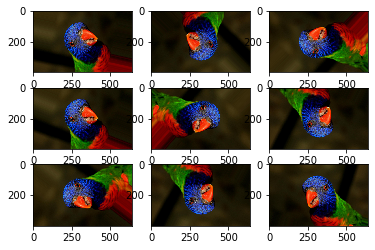

In [19]:
# example using image augmentation
from numpy import expand_dims
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot
# load the image
img = load_img('C:\\Users\\user\\Desktop\\ML\\Data\\bird.jpg')
# convert to numpy array
data = img_to_array(img)
# expand dimension to one sample
samples = expand_dims(data, 0)
# create image data augmentation generator
datagen = ImageDataGenerator(horizontal_flip=True, vertical_flip=True, rotation_range=90)
# prepare iterator
it = datagen.flow(samples, batch_size=1)
# generate samples and plot
for i in range(9):
     # define subplot
     pyplot.subplot(330 + 1 + i)
     # generate batch of images
     batch = it.next()
     # convert to unsigned integers for viewing
     image = batch[0].astype('uint32')
     # plot raw pixel data
     pyplot.imshow(image)
# show the figure
pyplot.show()

## Face Detection

We will discover how to use a convolutional neural network for face detection.
Face detection is a trivial problem for humans to solve and has been solved reasonably well by classical feature-based techniques, such as the cascade classifier.
More recently, deep learning methods have achieved state-of-the-art results on standard face detection datasets. One example is the Multi-task Cascade Convolutional Neural Network, or MTCNN for short.
The ipazc/MTCNN project provides an open source implementation of the MTCNN.

In [ ]:
# face detection with mtcnn on a photograph
from matplotlib import pyplot
from matplotlib.patches import Rectangle
from mtcnn.mtcnn import MTCNN
# load image from file
pixels = pyplot.imread('C:\\Users\\user\\Desktop\\ML\\Data\\street.jpg')
# create the detector, using default weights
detector = MTCNN()
# detect faces in the image
faces = detector.detect_faces(pixels)
# plot the image
pyplot.imshow(pixels)
# get the context for drawing boxes
ax = pyplot.gca()
# get coordinates from the first face
x, y, width, height = faces[0]['box']
# create the shape
rect = Rectangle((x, y), width, height, fill=False, color='red')
# draw the box
ax.add_patch(rect)
# show the plot
pyplot.show()